In [1]:
#TensorFlow and tf.keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.13.0


## Import the Fashion MNIST dataset

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Build the model - Original

Follow the instruction requirement:

*   1st layer has to be Flattened with input_shape=(28, 28)
*   Last layer has to be a Dense layer with 10 nodes.

In [5]:
originalModel = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)])

originalModel.compile(optimizer='Adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [6]:
originalModel.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.4948 - accuracy: 0.8254
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3737 - accuracy: 0.8656
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3348 - accuracy: 0.8777
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3122 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2933 - accuracy: 0.8927
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2803 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2673 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2568 - accuracy: 0.9038
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2476 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.23

In [7]:
test_loss, test_acc = originalModel.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3241 - accuracy: 0.8833 - 694ms/epoch - 2ms/step

Test accuracy: 0.8833000063896179


Original model has an accuracy of about:

*   91.11% on training data.
*   88.33% on testing data.



## 2nd Model - 2 hidden layers.

Follow the instruction requirement:
*   Expand Original Model.
*   2nd hidden layer of size 32.

In [8]:
model2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)])

model2.compile(optimizer='Adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [9]:
model2.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4980 - accuracy: 0.8248
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3695 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3351 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3123 - accuracy: 0.8849
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2974 - accuracy: 0.8903
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2825 - accuracy: 0.8949
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2706 - accuracy: 0.8971
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2589 - accuracy: 0.9036
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2506 - accuracy: 0.9062
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.239

In [10]:
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3619 - accuracy: 0.8721 - 825ms/epoch - 3ms/step

Test accuracy: 0.8720999956130981


Second model with 2 hidden layers has an accuracy of about:

*   90.99% on training data.
*   87.20% on testing data.

## 3rd Model - 2 hidden layers with learning rate of 0.01.

In [11]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)])

from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.01)
model3.compile(optimizer=opt,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [12]:
model3.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5476 - accuracy: 0.8021
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4343 - accuracy: 0.8440
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4087 - accuracy: 0.8537
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4035 - accuracy: 0.8547
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3900 - accuracy: 0.8597
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3792 - accuracy: 0.8661
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3732 - accuracy: 0.8676
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3701 - accuracy: 0.8676
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3618 - accuracy: 0.8723
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.358

In [13]:
test_loss, test_acc = model3.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4355 - accuracy: 0.8573 - 704ms/epoch - 2ms/step

Test accuracy: 0.8572999835014343


Third model with 2 hidden layers - learning rate of 0.01 has an accuracy of about:

*   87.37% on training data.
*   85.73% on testing data.

## 4th Model - 2 hidden layers with learning rate of 0.00025 and L2 regularization.

In [16]:
from tensorflow.keras import regularizers
model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.L2(0.01), bias_regularizer=regularizers.L2(0.01), activity_regularizer=regularizers.L2(0.01)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.L2(0.01), bias_regularizer=regularizers.L2(0.01), activity_regularizer=regularizers.L2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)])

opt = keras.optimizers.Adam(learning_rate=0.00025)
model4.compile(optimizer=opt,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [17]:
model4.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.8514 - accuracy: 0.7327
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 1.0075 - accuracy: 0.8071
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.8798 - accuracy: 0.8166
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.8217 - accuracy: 0.8214
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7841 - accuracy: 0.8240
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7591 - accuracy: 0.8245
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7364 - accuracy: 0.8277
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7197 - accuracy: 0.8305
Epoch 9/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7030 - accuracy: 0.8320
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.696

In [18]:
test_loss, test_acc = model4.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.6478 - accuracy: 0.8437 - 858ms/epoch - 3ms/step

Test accuracy: 0.8436999917030334


Third model with 2 hidden layers - learning rate of 0.01 has an accuracy of about:

*   83.23% on training data.
*   84.36% on testing data.

## Final Model - 2 hidden layers with learning rate of 0.00025, L2 regularization, and second hidden layer drop out = 0.2.

In [19]:
model5 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.L2(0.01), bias_regularizer=regularizers.L2(0.01), activity_regularizer=regularizers.L2(0.01)),
    tf.keras.layers.Dense(32, activation='relu', kernel_regularizer=regularizers.L2(0.01), bias_regularizer=regularizers.L2(0.01), activity_regularizer=regularizers.L2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')])

opt = keras.optimizers.Adam(learning_rate=0.00025)
model5.compile(optimizer=opt,
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=['accuracy'])

In [20]:
model5.fit(train_images, train_labels, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 7s 3ms/step - loss: 1.7687 - accuracy: 0.7538
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.9487 - accuracy: 0.8195
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.8260 - accuracy: 0.8282
Epoch 4/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7632 - accuracy: 0.8338
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7245 - accuracy: 0.8382
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6927 - accuracy: 0.8431
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6707 - accuracy: 0.8445
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6514 - accuracy: 0.8463
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6354 - accuracy: 0.8495
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6238 - accurac

In [21]:
test_loss, test_acc = model5.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.6090 - accuracy: 0.8509 - 815ms/epoch - 3ms/step

Test accuracy: 0.8508999943733215


Third model with 2 hidden layers - learning rate of 0.01 has an accuracy of about:

*   85.04% on training data.
*   85.08% on testing data.

In [22]:
finalModel = model5.fit(train_images, train_labels, epochs=50,
    validation_data=(test_images, test_labels))

Epoch 1/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.6113 - accuracy: 0.8519 - val_loss: 0.6055 - val_accuracy: 0.8480
Epoch 2/50
1875/1875 [==============================] - 10s 5ms/step - loss: 0.6000 - accuracy: 0.8553 - val_loss: 0.5899 - val_accuracy: 0.8538
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5925 - accuracy: 0.8544 - val_loss: 0.5767 - val_accuracy: 0.8552
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5838 - accuracy: 0.8561 - val_loss: 0.5715 - val_accuracy: 0.8524
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5767 - accuracy: 0.8579 - val_loss: 0.5647 - val_accuracy: 0.8575
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5732 - accuracy: 0.8568 - val_loss: 0.5649 - val_accuracy: 0.8526
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5654 - accuracy: 0.8589 - val_loss: 0.5731 - val_accuracy

In [23]:
print(finalModel.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


## Plot distribution of train and test set performance.

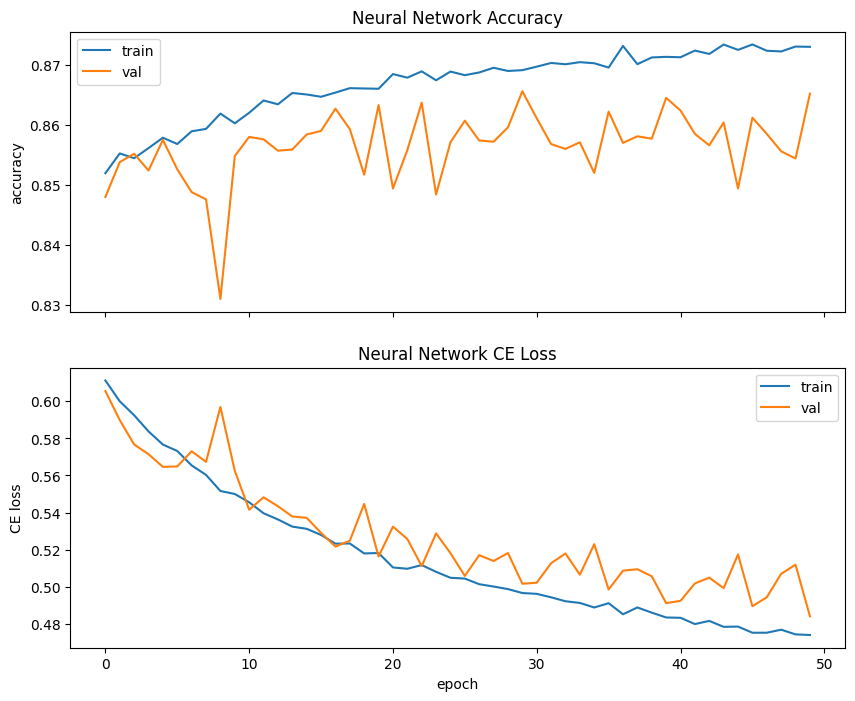

In [24]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

axes[0].plot(finalModel.history['accuracy'], label='train')
axes[0].plot(finalModel.history['val_accuracy'], label='val')
axes[0].set_title('Neural Network Accuracy')
axes[0].set_ylabel('accuracy')
axes[0].legend(loc='best')

axes[1].plot(finalModel.history['loss'], label='train')
axes[1].plot(finalModel.history['val_loss'], label='val')
axes[1].set_title('Neural Network CE Loss')
axes[1].set_ylabel('CE loss')
axes[1].set_xlabel('epoch')
axes[1].legend(loc='best')

plt.show()

## Make predictions.

In [25]:
probabilityModel = tf.keras.Sequential([model5, tf.keras.layers.Softmax()])

In [26]:
predictions = probabilityModel.predict(test_images)

313/313 [==============================] - 1s 1ms/step


Look at the first prediction:

In [27]:
predictions[0]

array([0.08842524, 0.08821581, 0.08821923, 0.08826642, 0.08830055,
       0.09774282, 0.0885104 , 0.10392267, 0.08957396, 0.17882289],
      dtype=float32)

In [28]:
np.argmax(predictions[0])

9

Same output as original model, the final model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [29]:
test_labels[0]

9

Define functions to graph the full set of 10 class predictions.

In [30]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## Verify predictions

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

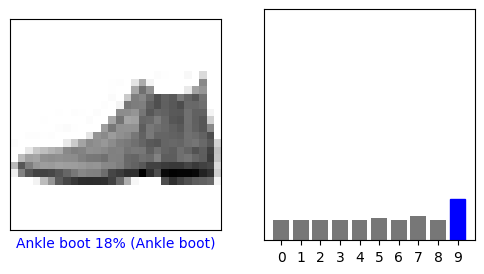

In [31]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Compare to the original model, the prediction confidence level is not that significantly standout. My thought is because I am applying L2 regularization which put penalty prevent extreme weight value. Hence, resonably distributed weight accross features (pixels).

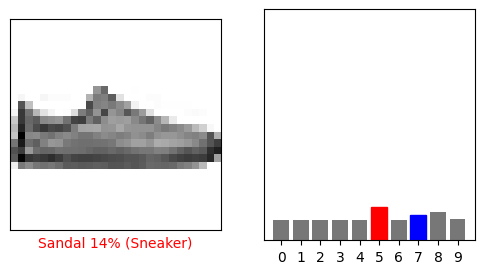

In [32]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Results are consistnt with orginal model.

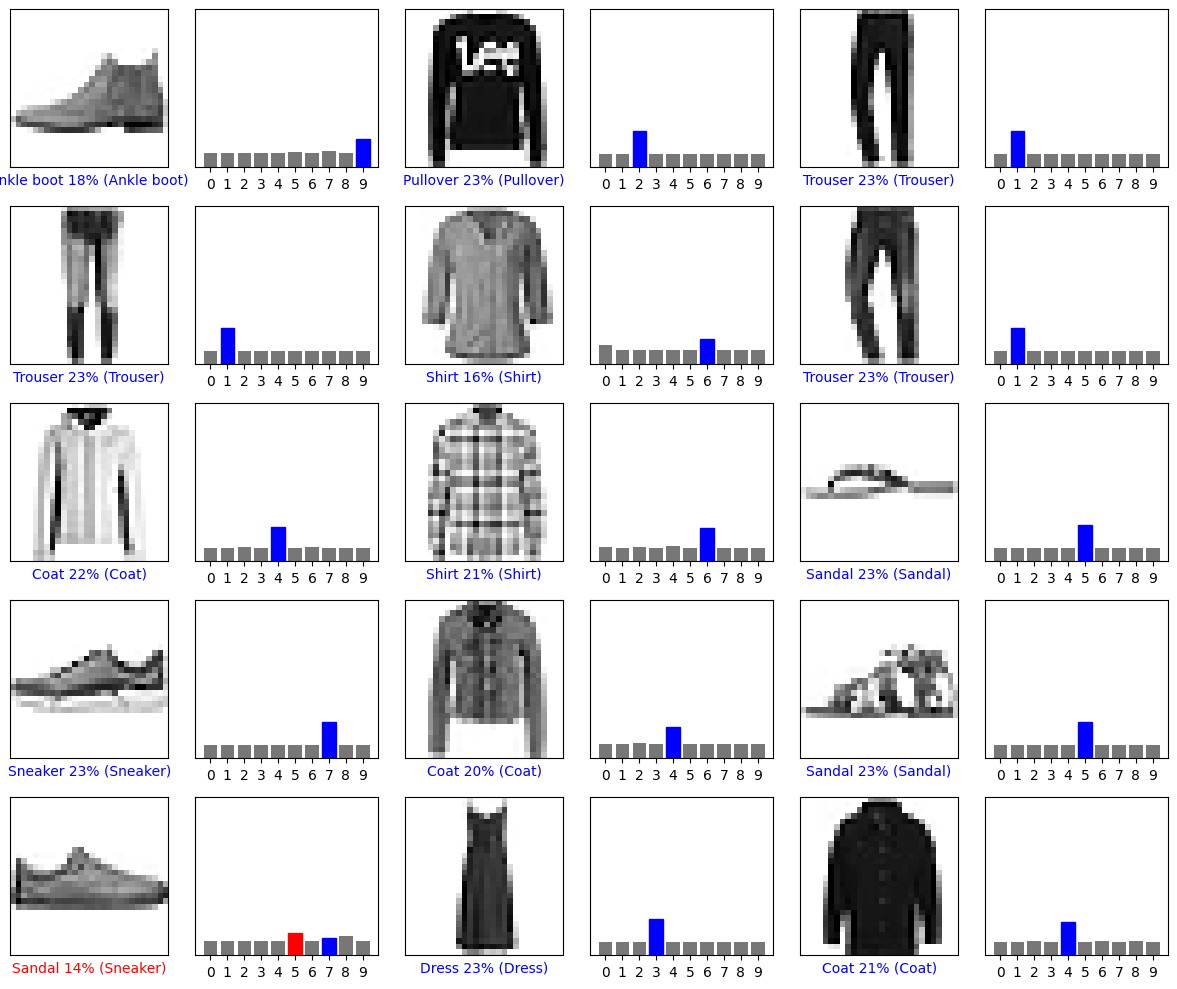

In [33]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()